we used car_data in this project


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
dataset = pd.read_csv('/content/car data.csv')

In [5]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
dataset.shape

(301, 9)

In [10]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [15]:
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
x = dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = dataset['Selling_Price']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [21]:
print(x.shape,x_train,x_test)

(301, 7)      Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
204  2015          4.430       28282  ...            0             0      0
249  2016          7.600       17000  ...            0             0      0
277  2015         13.600       21780  ...            0             0      0
194  2008          0.787       50000  ...            1             0      0
244  2013          9.400       49000  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
75   2015          6.800       36000  ...            0             0      0
22   2011          8.010       50000  ...            0             1      0
72   2013         18.610       56001  ...            0             0      0
15   2016         10.790       43000  ...            0             0      0
168  2013          0.730       12000  ...            1             0      0

[270 rows x 7 columns]      Year  Present_Price  Kms_Driven  ...  Seller_Type 

# Linear Regression

uses when directly correlated

In [34]:
model1 = LinearRegression()

In [23]:
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_train_predict = model1.predict(x_train)

In [28]:
score = metrics.r2_score(y_train_predict,y_train)
print('r2_error is ',score)

r2_error is  0.8635655509198777


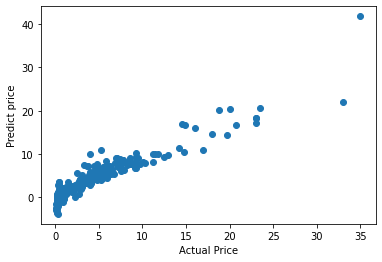

In [29]:
plt.scatter(y_train,y_train_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predict price')
plt.show()

In [30]:
y_test_predict = model1.predict(x_test)

In [32]:
score1 = metrics.r2_score(y_test_predict,y_test)
print('r2_error is ',score1)

r2_error is  0.8062199941176358


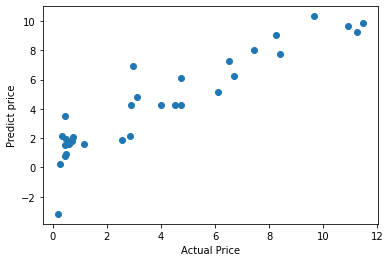

In [33]:
plt.scatter(y_test,y_test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predict price')
plt.show()

# Lasso Regression 

used for most of case having different
pattern in features

In [35]:
model2 = Lasso()

In [36]:
model2.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
y_train_predict = model2.predict(x_train)

In [41]:
score = metrics.r2_score(y_train_predict,y_train)
print('r2_error is ',score)

r2_error is  0.798459024070425


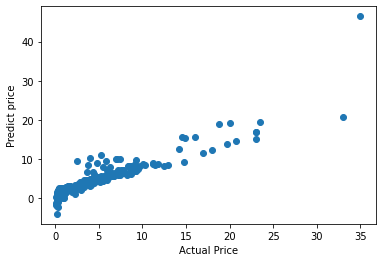

In [42]:
plt.scatter(y_train,y_train_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predict price')
plt.show()

In [43]:
y_test_predict = model2.predict(x_test)

In [44]:
score1 = metrics.r2_score(y_test_predict,y_test)
print('r2_error is ',score1)

r2_error is  0.7711110403265475


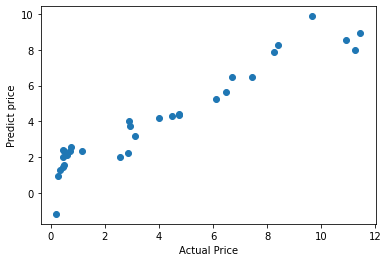

In [45]:
plt.scatter(y_test,y_test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predict price')
plt.show()